In [68]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from scipy.stats import zscore, ks_2samp
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import pickle
import math

In [69]:
a = pd.read_excel(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\A.xlsx')
b = pd.read_excel(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\B.xlsx')

In [70]:
a['lastOnline'] = a['lastOnline'].dt.tz_localize('UTC')
b['lastOnline'] = pd.to_datetime(b['lastOnline'])

a = a.drop(columns = 'gender')
b = b.drop(columns = 'gender')

a.countDetails = a.countDetails.round(decimals=2)
a.distance = a.distance.round(decimals=2)
b.distance = b.distance.round(decimals=2)

a['locationCity'] = a['locationCity'].astype(str).fillna('').apply(lambda x: x.split()[0])
b['locationCity'] = b['locationCity'].astype(str).fillna('').apply(lambda x: x.split()[0])


a['whazzup'] = a['whazzup'].str.replace(' ', '').str.replace('\n', '').str.replace('\r', '')
a['whazzup'] = a['whazzup'].apply(lambda x: x.split() if isinstance(x, str) else [])
a['whazzup'] = a['whazzup'].apply(lambda x: ' '.join(x))
b['whazzup'] = b['whazzup'].str.replace(' ', '').str.replace('\n', '').str.replace('\r', '')
b['whazzup'] = b['whazzup'].apply(lambda x: x.split() if isinstance(x, str) else [])
b['whazzup'] = b['whazzup'].apply(lambda x: ' '.join(x))

a['distance'] = a['distance'].fillna(0)
b['distance'] = b['distance'].fillna(0)

for bol in a.select_dtypes(include='bool'):
    a[bol] = a[bol].replace(False,0)
    a[bol] = a[bol].replace(True,1)

for bol in b.select_dtypes(include='bool'):
    b[bol] = b[bol].replace(False,0)
    b[bol] = b[bol].replace(True,1)

In [71]:
a.to_csv('a.csv')
b.to_csv('b.csv')

In [72]:
mm = a.merge(b,how='outer',on=['userId','age', 'name', 'counts_pictures', 'counts_profileVisits',
       'counts_kisses', 'flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'isVIP', 'isVerified','lastOnline',
       'lastOnlineTs', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'city', 'locationCity', 'countDetails',
       'flirtstar', 'hasBirthday', 'highlighted', 'distance',
       'mobile', 'online', 'whazzup', 'pictureId'])

In [73]:
mm.set_index('userId',inplace=True)

In [74]:
max_dates = mm.groupby('userId')['lastOnline'].agg('max')
r = pd.merge(mm, max_dates, on=['userId', 'lastOnline'])

In [75]:
r.head()

age     name      counts_pictures  \
userId                                                        
4e3842f79b70e7ea57000064  25         daeni         4          
4e3d34bf5d2bce7b160006a3  22   italiana 92         5          
4eef8b81ebf2c8f64000000c  20    Qqkwmdowlo         3          
4ef9434cca61bece6a000002  24      Baby dee        18          
4f10cbc1883fa97a5f000015  24          Anna        13          

                          counts_profileVisits  counts_kisses  \
userId                                                          
4e3842f79b70e7ea57000064           8279              239        
4e3d34bf5d2bce7b160006a3            663               13        
4eef8b81ebf2c8f64000000c          22187             1015        
4ef9434cca61bece6a000002           7339              180        
4f10cbc1883fa97a5f000015          18672              492        

                          flirtInterests_chat  flirtInterests_friends  \
userId                                                                  
4e3842f79b70e7ea57000064           1                      1             
4e3d34bf5d2bce7b160006a3           1                      1             
4eef8b81ebf2c8f64000000c           1                      1             
4ef9434cca61bece6a000002           1                      0             
4f10cbc1883fa97a5f000015           0                      1             

                          flirtInterests_date  isVIP  isVerified  \
userId                                                             
4e3842f79b70e7ea57000064           1             0         0       
4e3d34bf5d2bce7b160006a3           1             0         0       
4eef8b81ebf2c8f64000000c           0             0         0       
4ef9434cca61bece6a000002           1             0         0       
4f10cbc1883fa97a5f000015           0             0         0       

                                 lastOnline         lastOnlineTs  lang_count  \
userId                                                                         
4e3842f79b70e7ea57000064 2015-04-25 20:43:26+00:00  1.429995e+09       1       
4e3d34bf5d2bce7b160006a3 2015-04-26 09:19:35+00:00  1.430040e+09       3       
4eef8b81ebf2c8f64000000c 2015-04-07 11:21:01+00:00  1.428406e+09       2       
4ef9434cca61bece6a000002 2015-04-08 14:37:51+00:00  1.428504e+09       2       
4f10cbc1883fa97a5f000015 2015-04-27 19:29:58+00:00  1.430163e+09       5       

                          lang_fr  lang_en  lang_de  lang_it  lang_es  \
userId                                                                  
4e3842f79b70e7ea57000064     0        0        1        0        0      
4e3d34bf5d2bce7b160006a3     1        0        1        1        0      
4eef8b81ebf2c8f64000000c     1        1        0        0        0      
4ef9434cca61bece6a000002     0        1        1        0        0      
4f10cbc1883fa97a5f000015     0        1        1        0        0      

                          lang_pt        city          locationCity    \
userId                                                                  
4e3842f79b70e7ea57000064     0           Rothenburg          RÃ¼mlang   
4e3d34bf5d2bce7b160006a3     0              Sissach           Sissach   
4eef8b81ebf2c8f64000000c     0            MontrÃ©al             Berne   
4ef9434cca61bece6a000002     0     Titisee-Neustadt  Titisee-Neustadt   
4f10cbc1883fa97a5f000015     0            Stuttgart         Stuttgart   

                          countDetails  crypt_x  flirtstar  hasBirthday  \
userId                                                                    
4e3842f79b70e7ea57000064      1.00        0.0        0           0        
4e3d34bf5d2bce7b160006a3      0.85        0.0        0           0        
4eef8b81ebf2c8f64000000c      0.12        0.0        0           0        
4ef9434cca61bece6a000002      0.81        0.0        0           0        
4f10cbc1883fa97a5f000015      0.65        0.0        0           0        

                          hi

In [76]:
r['lastOnlineTs']=r['lastOnlineTs'].astype('float64')
r['countDetails']=r['countDetails'].astype('float64')
r['crypt_x']=r['crypt_x'].astype('float64')
r['distance']=r['distance'].astype('float64')
r['isSystemProfile_x']=r['isSystemProfile_x'].astype('float64')
r['connectedToFacebook']=r['connectedToFacebook'].astype('float64')
r['freshman']=r['freshman'].astype('float64')
r['locked']=r['locked'].astype('float64')
r['crypt_y']=r['crypt_y'].astype('float64')
r['isSystemProfile_y']=r['isSystemProfile_y'].astype('float64')
r['counts_fans']=r['counts_fans'].astype('float64')
r['counts_g']=r['counts_g'].astype('float64')
r['isInfluencer']=r['isInfluencer'].astype('float64')
r['isNew']=r['isNew'].astype('float64')
r['shareProfileEnabled']=r['shareProfileEnabled'].astype('float64')

r['name']=r['name'].astype(str)
r['city']=r['city'].astype(str)
r['pictureId']=r['pictureId'].astype(str)
r['locationCitySub']=r['locationCitySub'].astype(str)
r['genderLooking']=r['genderLooking'].astype(str)
r['country']=r['country'].astype(str)
r['freetext']=r['freetext'].astype(str)
r['whazzup']=r['whazzup'].astype(str)

In [77]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   age                     4008 non-null   int64              
 1   name                    4008 non-null   object             
 2   counts_pictures         4008 non-null   int64              
 3   counts_profileVisits    4008 non-null   int64              
 4   counts_kisses           4008 non-null   int64              
 5   flirtInterests_chat     4008 non-null   int64              
 6   flirtInterests_friends  4008 non-null   int64              
 7   flirtInterests_date     4008 non-null   int64              
 8   isVIP                   4008 non-null   int64              
 9   isVerified              4008 non-null   int64              
 10  lastOnline              4007 non-nu

In [78]:
r['isfreshman'] = r['freshman'].fillna(r['isNew'])
r['crypt'] = r['crypt_x'].fillna(r['crypt_y'])
r['isSystemProfile'] = r['isSystemProfile_x'].fillna(r['isSystemProfile_y'])
r = r.drop(columns=['freshman','isNew','highlighted','crypt_x','crypt_y','isSystemProfile_x','isSystemProfile_y','userInfo_visitDate'])
r['connectedToFacebook']=r['connectedToFacebook'].fillna(-1)
r['isInfluencer']=r['isInfluencer'].fillna(-1)

In [79]:
def emoji(text):
    patterns = [':D', ':-D', '=D', '^_^', '^.^', ':3', ':-3', ';)', ':)', '(:', ':-)', '(-:', '=)', '(=', '=-)', '(-=', ':]', '[:', ':-]', '[-:', ';)', '(;', ';-)', '(-;', ';]', '[;', ';-]', '[-;']
    for pattern in patterns:
        if pattern in text:
            return 1
    return 0

def insta(text):
    if 'insta' in text.lower() or 'gram' in text.lower(): 
        return 1
    else:
        return 0
    
def pic(text):
    if text == 'nan':
        return 0
    else:
        return 1
    
r['ISinsta'] = r['whazzup'].apply(insta)
r['ISemoji'] = r['whazzup'].apply(emoji)
r['ISinsta1'] = r['freetext'].apply(insta)
r['ISemoji1'] = r['freetext'].apply(emoji)
r['ISpicture'] = r['pictureId'].apply(pic)

<class 'pandas.core.series.Series'>
Index: 113 entries, 4e3842f79b70e7ea57000064 to 54d9d5a3e76da1ac328b4577
Series name: freetext
Non-Null Count  Dtype 
--------------  ----- 
113 non-null    string
dtypes: string(1)
memory usage: 1.8+ KB


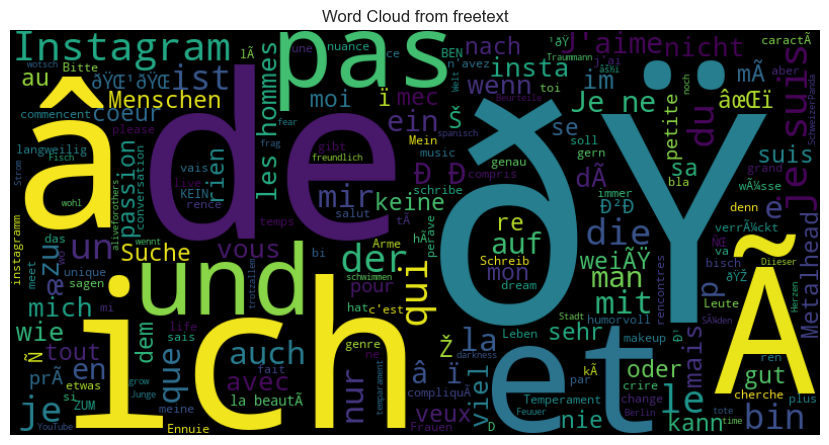

In [92]:
import nltk
from wordcloud import WordCloud

x = r[r['freetext']!='nan']

#loading the text_df
text = x['freetext'].astype('string')
text
text.info()
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from freetext")
plt.show()

<class 'pandas.core.series.Series'>
Index: 113 entries, 4e3842f79b70e7ea57000064 to 54d9d5a3e76da1ac328b4577
Series name: whazzup
Non-Null Count  Dtype 
--------------  ----- 
113 non-null    string
dtypes: string(1)
memory usage: 1.8+ KB


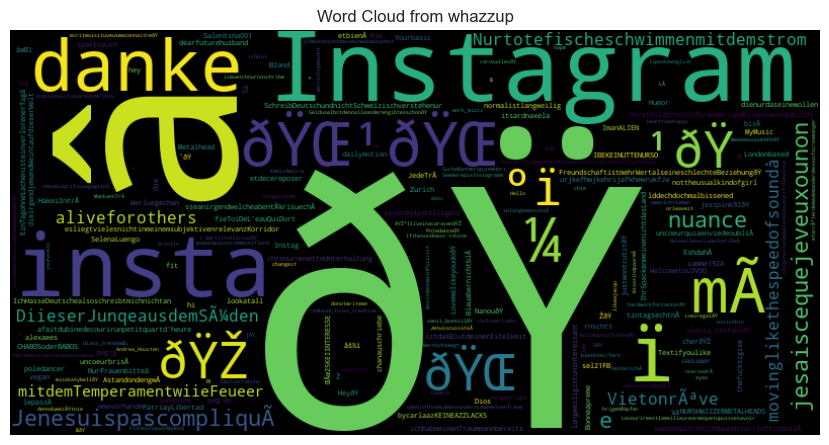

In [91]:
import nltk
from wordcloud import WordCloud
#loading the text_df
text = x['whazzup'].astype('string')
text
text.info()
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from whazzup")
plt.show()

In [48]:
r['ISinsta2'] = r['ISinsta'] | r['ISinsta1']
r['ISemoji2'] = r['ISemoji'] | r['ISemoji1']
r['IS_lang_pt_es_en_it'] = r['lang_en'] | r['lang_pt'] | r['lang_es'] | r['lang_it']

name_counts = r['name'].value_counts()
r['nameN'] = r['name'].map(lambda x: 'Other' if name_counts[x] < 10 else x)
city_counts = r['city'].value_counts()
r['cityN'] = r['city'].map(lambda x: 'Other' if city_counts[x] < 10 else x)
locationCity_counts = r['locationCity'].value_counts()
r['locationCityN'] = r['locationCity'].map(lambda x: 'Other' if locationCity_counts[x] < 10 else x)
locationCitySub_counts = r['locationCitySub'].value_counts()
r['locationCitySubN'] = r['locationCitySub'].map(lambda x: 'Other' if locationCitySub_counts[x] < 5 else x)
country_counts = r['country'].value_counts()
r['countryN'] = r['country'].map(lambda x: 'Other' if country_counts[x] < 10 else x)

r = r.drop(columns=['lastOnline', 'ISemoji','ISemoji1','ISinsta','ISinsta1','pictureId','lang_en','lang_pt','lang_es','lang_it','name','city','locationCity','locationCitySub','country','freetext','whazzup'])

r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4008 non-null   int64  
 1   counts_pictures         4008 non-null   int64  
 2   counts_profileVisits    4008 non-null   int64  
 3   counts_kisses           4008 non-null   int64  
 4   flirtInterests_chat     4008 non-null   int64  
 5   flirtInterests_friends  4008 non-null   int64  
 6   flirtInterests_date     4008 non-null   int64  
 7   isVIP                   4008 non-null   int64  
 8   isVerified              4008 non-null   int64  
 9   lastOnlineTs            4007 non-null   float64
 10  lang_count              4008 non-null   int64  
 11  lang_fr                 4008 non-null   int64  
 12  lang_de                 4008 non-null   int64  
 13  countDetails        

In [49]:
r.to_csv('r.csv')

In [50]:
#df = pd.read_csv(r"C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\r.csv")
df = r

In [51]:
df.shape

(4008, 38)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4008 non-null   int64  
 1   counts_pictures         4008 non-null   int64  
 2   counts_profileVisits    4008 non-null   int64  
 3   counts_kisses           4008 non-null   int64  
 4   flirtInterests_chat     4008 non-null   int64  
 5   flirtInterests_friends  4008 non-null   int64  
 6   flirtInterests_date     4008 non-null   int64  
 7   isVIP                   4008 non-null   int64  
 8   isVerified              4008 non-null   int64  
 9   lastOnlineTs            4007 non-null   float64
 10  lang_count              4008 non-null   int64  
 11  lang_fr                 4008 non-null   int64  
 12  lang_de                 4008 non-null   int64  
 13  countDetails        

In [53]:
for col in df.columns.tolist():
    print(col, df[col].max())

age 28
counts_pictures 30
counts_profileVisits 164425
counts_kisses 9288
flirtInterests_chat 1
flirtInterests_friends 1
flirtInterests_date 1
isVIP 1
isVerified 1
lastOnlineTs 1430647264.0
lang_count 9
lang_fr 1
lang_de 1
countDetails 1.0
flirtstar 1
hasBirthday 1
distance 6918.0
mobile 1
online 1
connectedToFacebook 0.0
locked 1.0
genderLooking none
counts_fans 241.0
counts_g 43.0
isInfluencer 0.0
shareProfileEnabled 1.0
isfreshman 1.0
crypt 1.0
isSystemProfile 1.0
ISpicture 1
ISinsta2 1
ISemoji2 1
IS_lang_pt_es_en_it 1
nameN Vanessa
cityN Ä°stanbulboÄŸazÄ±
locationCityN nan
locationCitySubN nan
countryN nan


In [54]:
# Type of valaues 
df.dtypes.to_csv("datatype.csv")
# Maximum valaues 
df.max().to_csv("max.csv")
# Minimum Values
df.min().to_csv("min.csv")
# Missing Values
df.isnull().sum(axis=0).to_csv("NA.csv")
# exporting results to the protocol
df.nunique().to_csv("unique.csv")

In [55]:
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     4008 non-null   int64   
 1   counts_pictures         4008 non-null   int64   
 2   counts_profileVisits    4008 non-null   int64   
 3   counts_kisses           4008 non-null   int64   
 4   flirtInterests_chat     4008 non-null   int64   
 5   flirtInterests_friends  4008 non-null   int64   
 6   flirtInterests_date     4008 non-null   int64   
 7   isVIP                   4008 non-null   int64   
 8   isVerified              4008 non-null   int64   
 9   lastOnlineTs            4007 non-null   float64 
 10  lang_count              4008 non-null   int64   
 11  lang_fr                 4008 non-null   int64   
 12  lang_de                 4008 non-null   int64   
 13  count

In [57]:
df.describe()

age      counts_pictures  counts_profileVisits  counts_kisses  \
count  4008.000000    4008.000000          4008.000000      4008.000000    
mean     21.990768       4.796407          3707.971307       156.609531    
std       1.957539       4.416993          6837.120627       377.041518    
min      18.000000       0.000000             0.000000         0.000000    
25%      20.000000       2.000000           384.000000        11.000000    
50%      22.000000       4.000000          1222.000000        44.000000    
75%      24.000000       6.000000          4083.000000       141.000000    
max      28.000000      30.000000        164425.000000      9288.000000    

       flirtInterests_chat  flirtInterests_friends  flirtInterests_date  \
count      4008.000000            4008.000000           4008.000000       
mean          0.626747               0.627745              0.387475       
std           0.483729               0.483466              0.487234       
min           0.000000               0.000000              0.000000       
25%           0.000000               0.000000              0.000000       
50%           1.000000               1.000000              0.000000       
75%           1.000000               1.000000              1.000000       
max           1.000000               1.000000              1.000000       

          isVIP     isVerified  lastOnlineTs  lang_count     lang_fr    \
count  4008.000000  4008.00000  4.007000e+03  4008.000000  4008.000000   
mean      0.022705     0.21981  1.428923e+09     1.110279     0.286677   
std       0.148979     0.41417  8.250713e+05     0.582426     0.452266   
min       0.000000     0.00000  1.426592e+09     0.000000     0.000000   
25%       0.000000     0.00000  1.428332e+09     1.000000     0.000000   
50%       0.000000     0.00000  1.428400e+09     1.000000     0.000000   
75%       0.000000     0.00000  1.429992e+09     1.000000     1.000000   
max       1.000000     1.00000  1.430647e+09     9.000000     1.000000   

         lang_de    countDetails   flirtstar   hasBirthday   distance    \
count  4008.000000   4008.000000  4008.000000  4008.000000  4008.000000   
mean      0.644461      0.570566     0.011976     0.003743   203.930913   
std       0.478736      0.326344     0.108791     0.061069   196.784295   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      0.310000     0.000000     0.000000    81.000000   
50%       1.000000      0.620000     0.000000     0.000000   171.000000   
75%       1.000000      0.850000     0.000000     0.000000   316.000000   
max       1.000000      1.000000     1.000000     1.000000  6918.000000   

         mobile       online     connectedToFacebook    locked     \
count  4008.000000  4008.000000      4008.000000      2940.000000   
mean      0.747006     0.584581        -0.266467         0.005102   
std       0.434782     0.492856         0.442166         0.071258   
min       0.000000     0.000000        -1.000000         0.000000   
25%       0.000000     0.000000        -1.000000         0.000000   
50%       1.000000     1.000000         0.000000         0.000000   
75%       1.000000     1.000000         0.000000         0.000000   
max       1.000000     1.000000         0.000000         1.000000   

       counts_fans   counts_g    isInfluencer  shareProfileEnabled  \
count  3983.000000  3983.000000   4008.000000      3983.000000       
mean      2.337685     0.125534     -0.006238         0.960834       
std      12.249138     1.240254      0.078741         0.194015       
min       0.000000     0.000000     -1.000000         0.000000       
25%       0.000000     0.000000      0.000000         1.000000       
50%       0.000000     0.000000      0.000000         1.000000       
75%       0.000000     0.000000      0.000000         1.000000       
max     241.000000    43.000000      0.000000         1.000000       

       isfreshman      crypt     isSystemProfile   ISp

In [58]:
df.to_csv("flatfile.csv")

In [59]:
with open('flatfile.pkl', 'wb') as f:
    pickle.dump(df, f)

# Descriptive Statistics

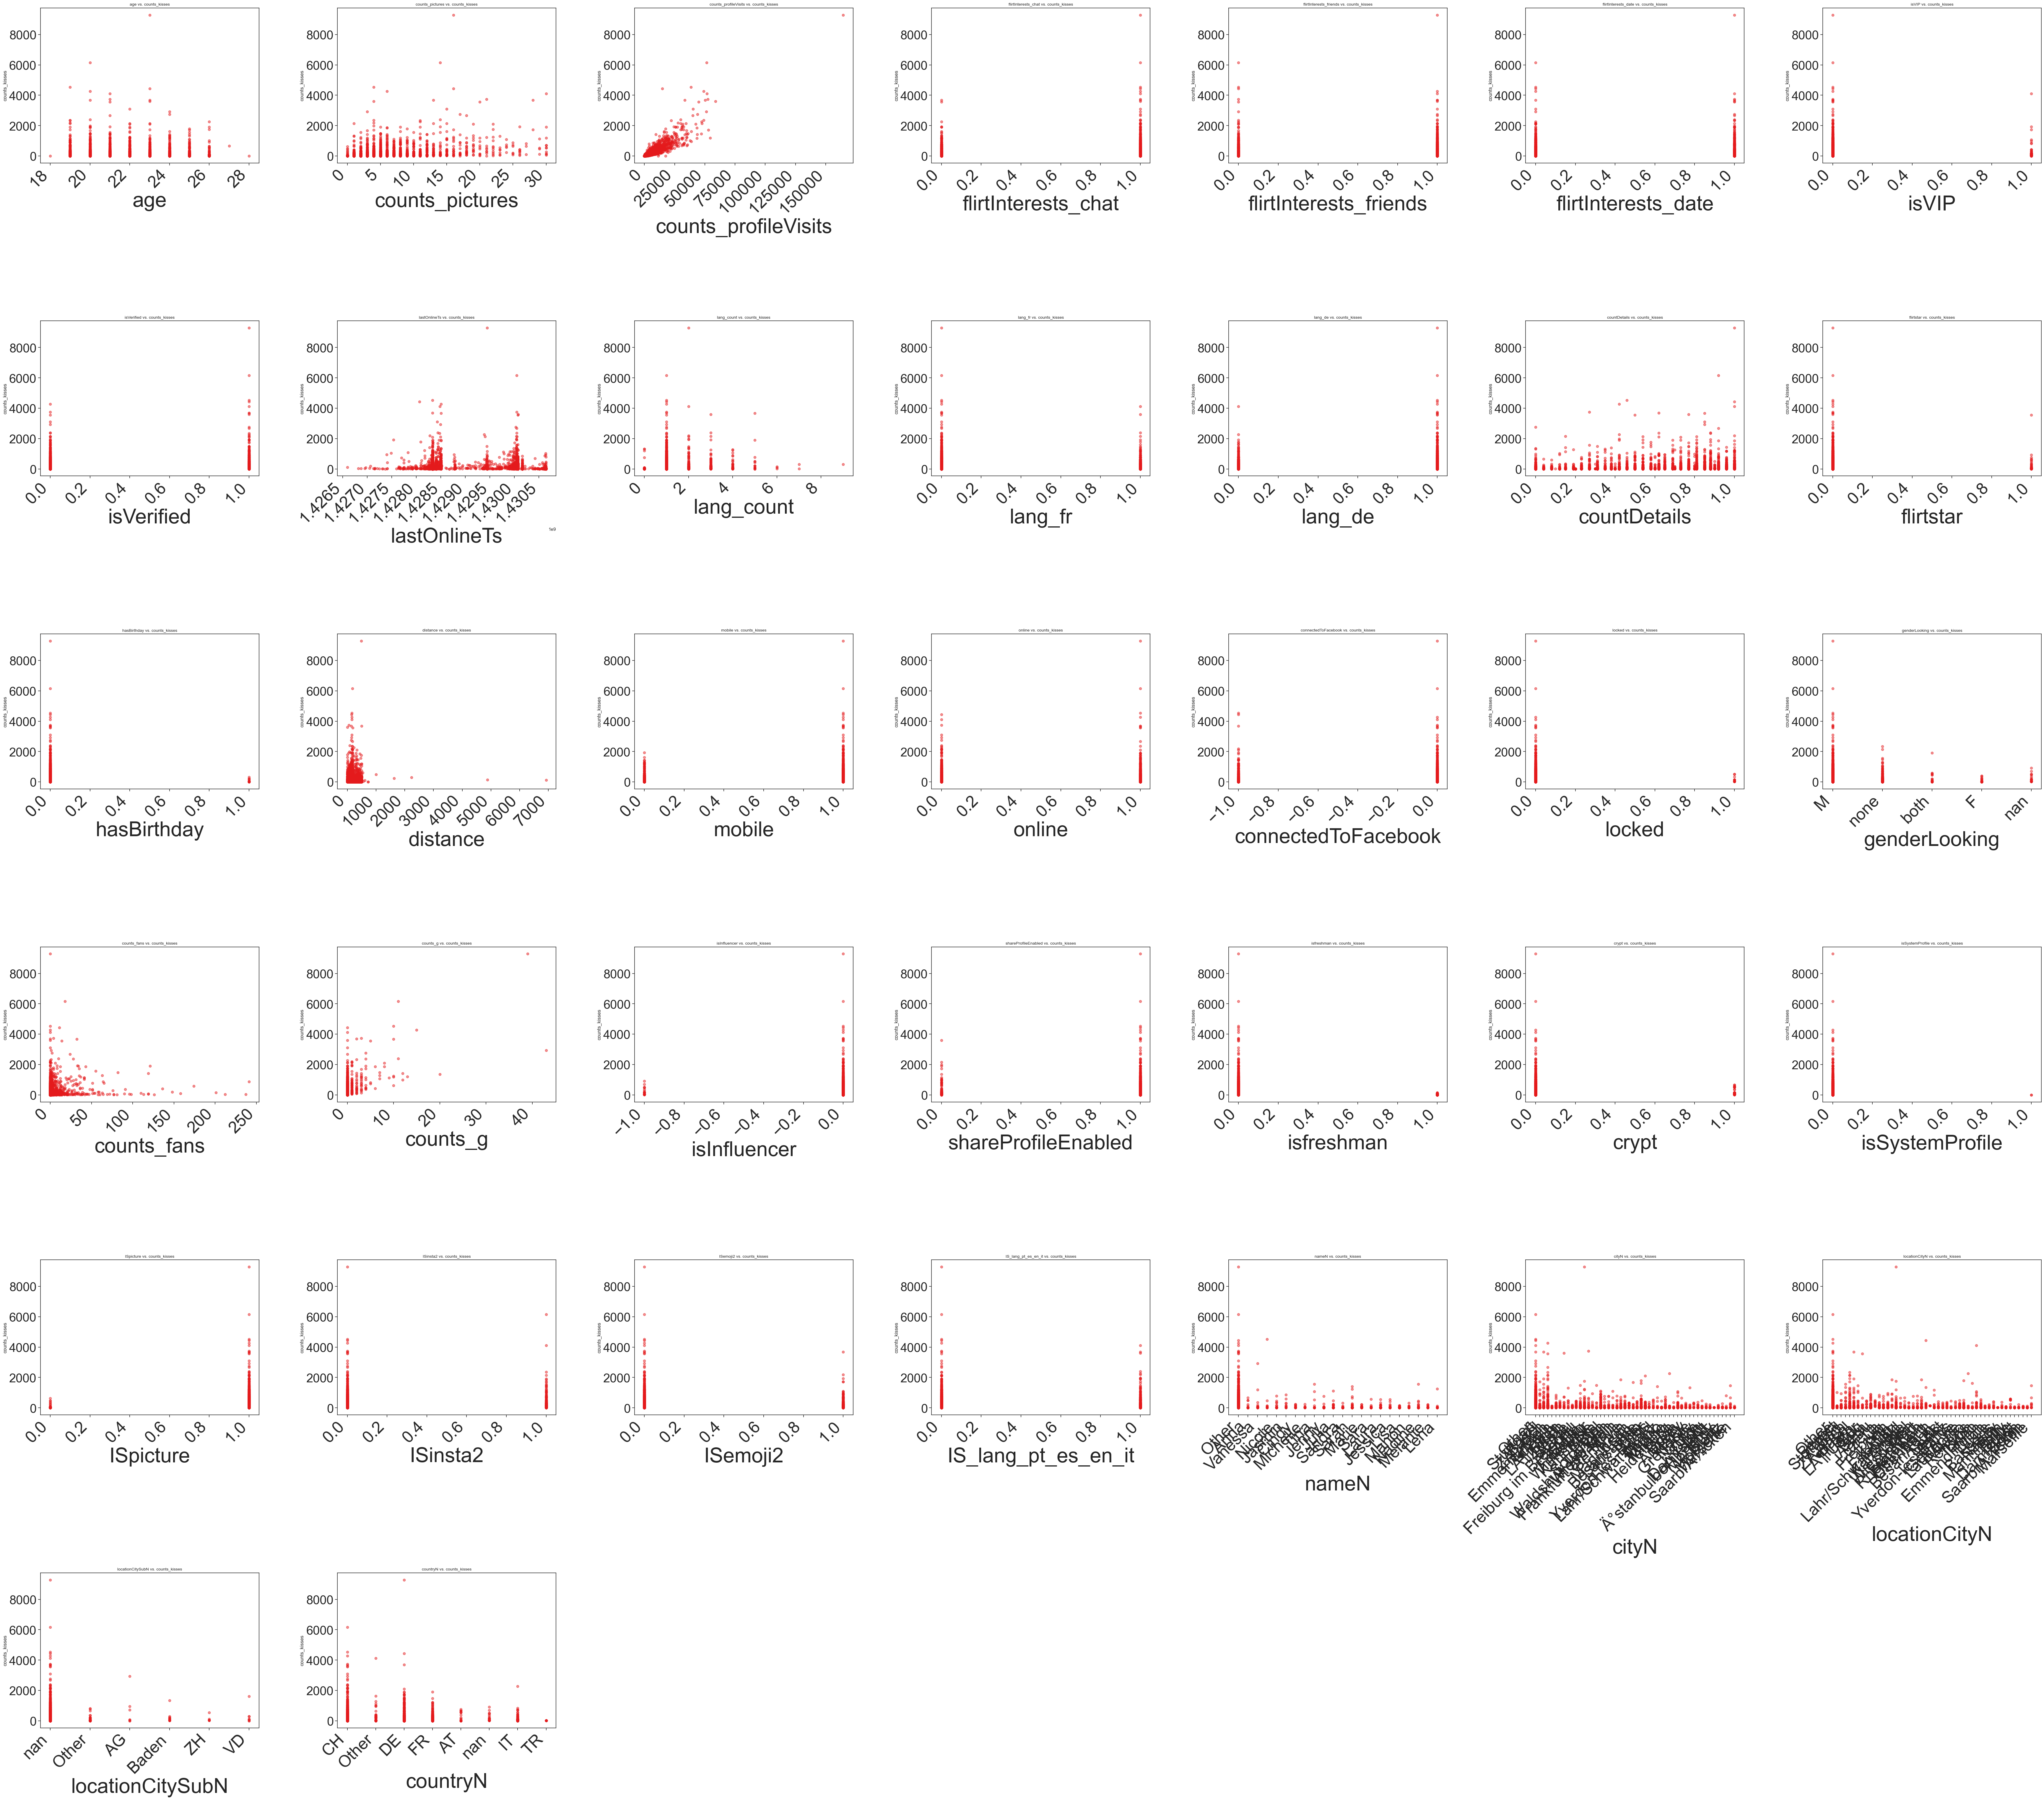

In [60]:
# List of features to plot against the target
features = df.columns.drop('counts_kisses')

# Determine the grid size
num_features = len(features)
grid_size = math.ceil(math.sqrt(num_features))

# Plot scatter plots
plt.figure(figsize=(grid_size * 10, grid_size * 10))  # Increase the figure size

for i, feature in enumerate(features):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.scatter(df[feature], df['counts_kisses'], alpha=0.5)
    plt.title(f'{feature} vs. counts_kisses', fontsize=10)
    plt.xlabel(feature, fontsize=50)
    plt.ylabel('counts_kisses', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=40)  # Rotate x-axis labels
    plt.yticks(fontsize=30)

plt.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()


In [65]:
con_cols = df.select_dtypes(exclude=['category']).columns.tolist()
df_f = df[con_cols]

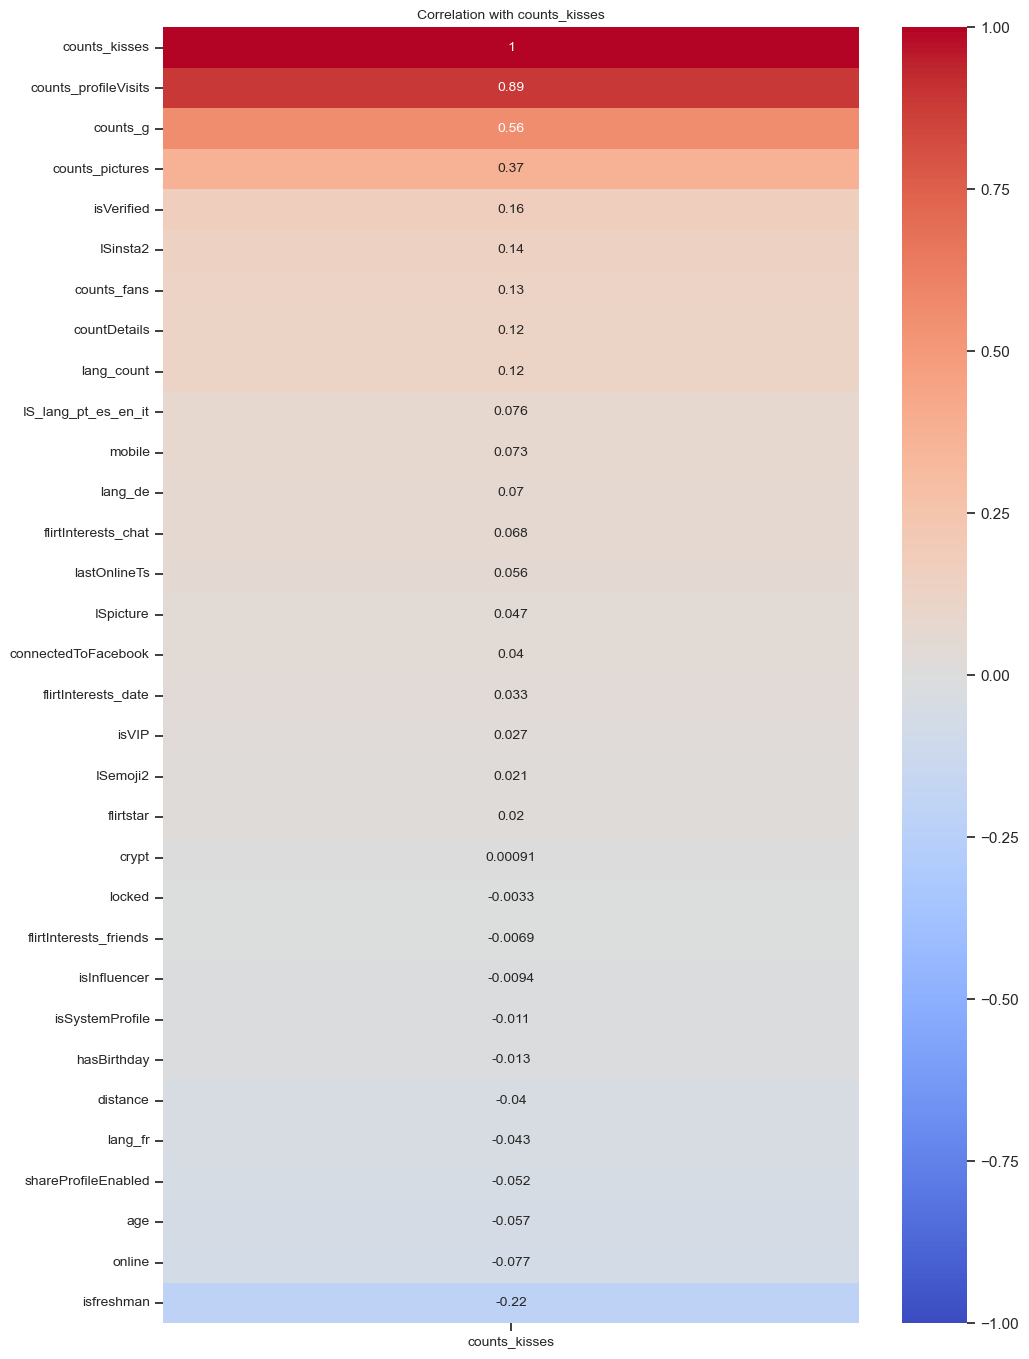

In [66]:
# Compute the correlation matrix
corr = df_f.corr()

# Specifically check correlation with the target variable
plt.figure(figsize=(10, len(corr.columns) * 0.5)) 
sb.heatmap(corr[['counts_kisses']].sort_values(by='counts_kisses', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10} )
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Correlation with counts_kisses', fontsize=10)
plt.show()


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (4008, 39)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
lastOnline of type=datetime64[ns, UTC] is not classified
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  6
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  22
    Number of Discrete String Column

Number of All Scatter Plots = 15


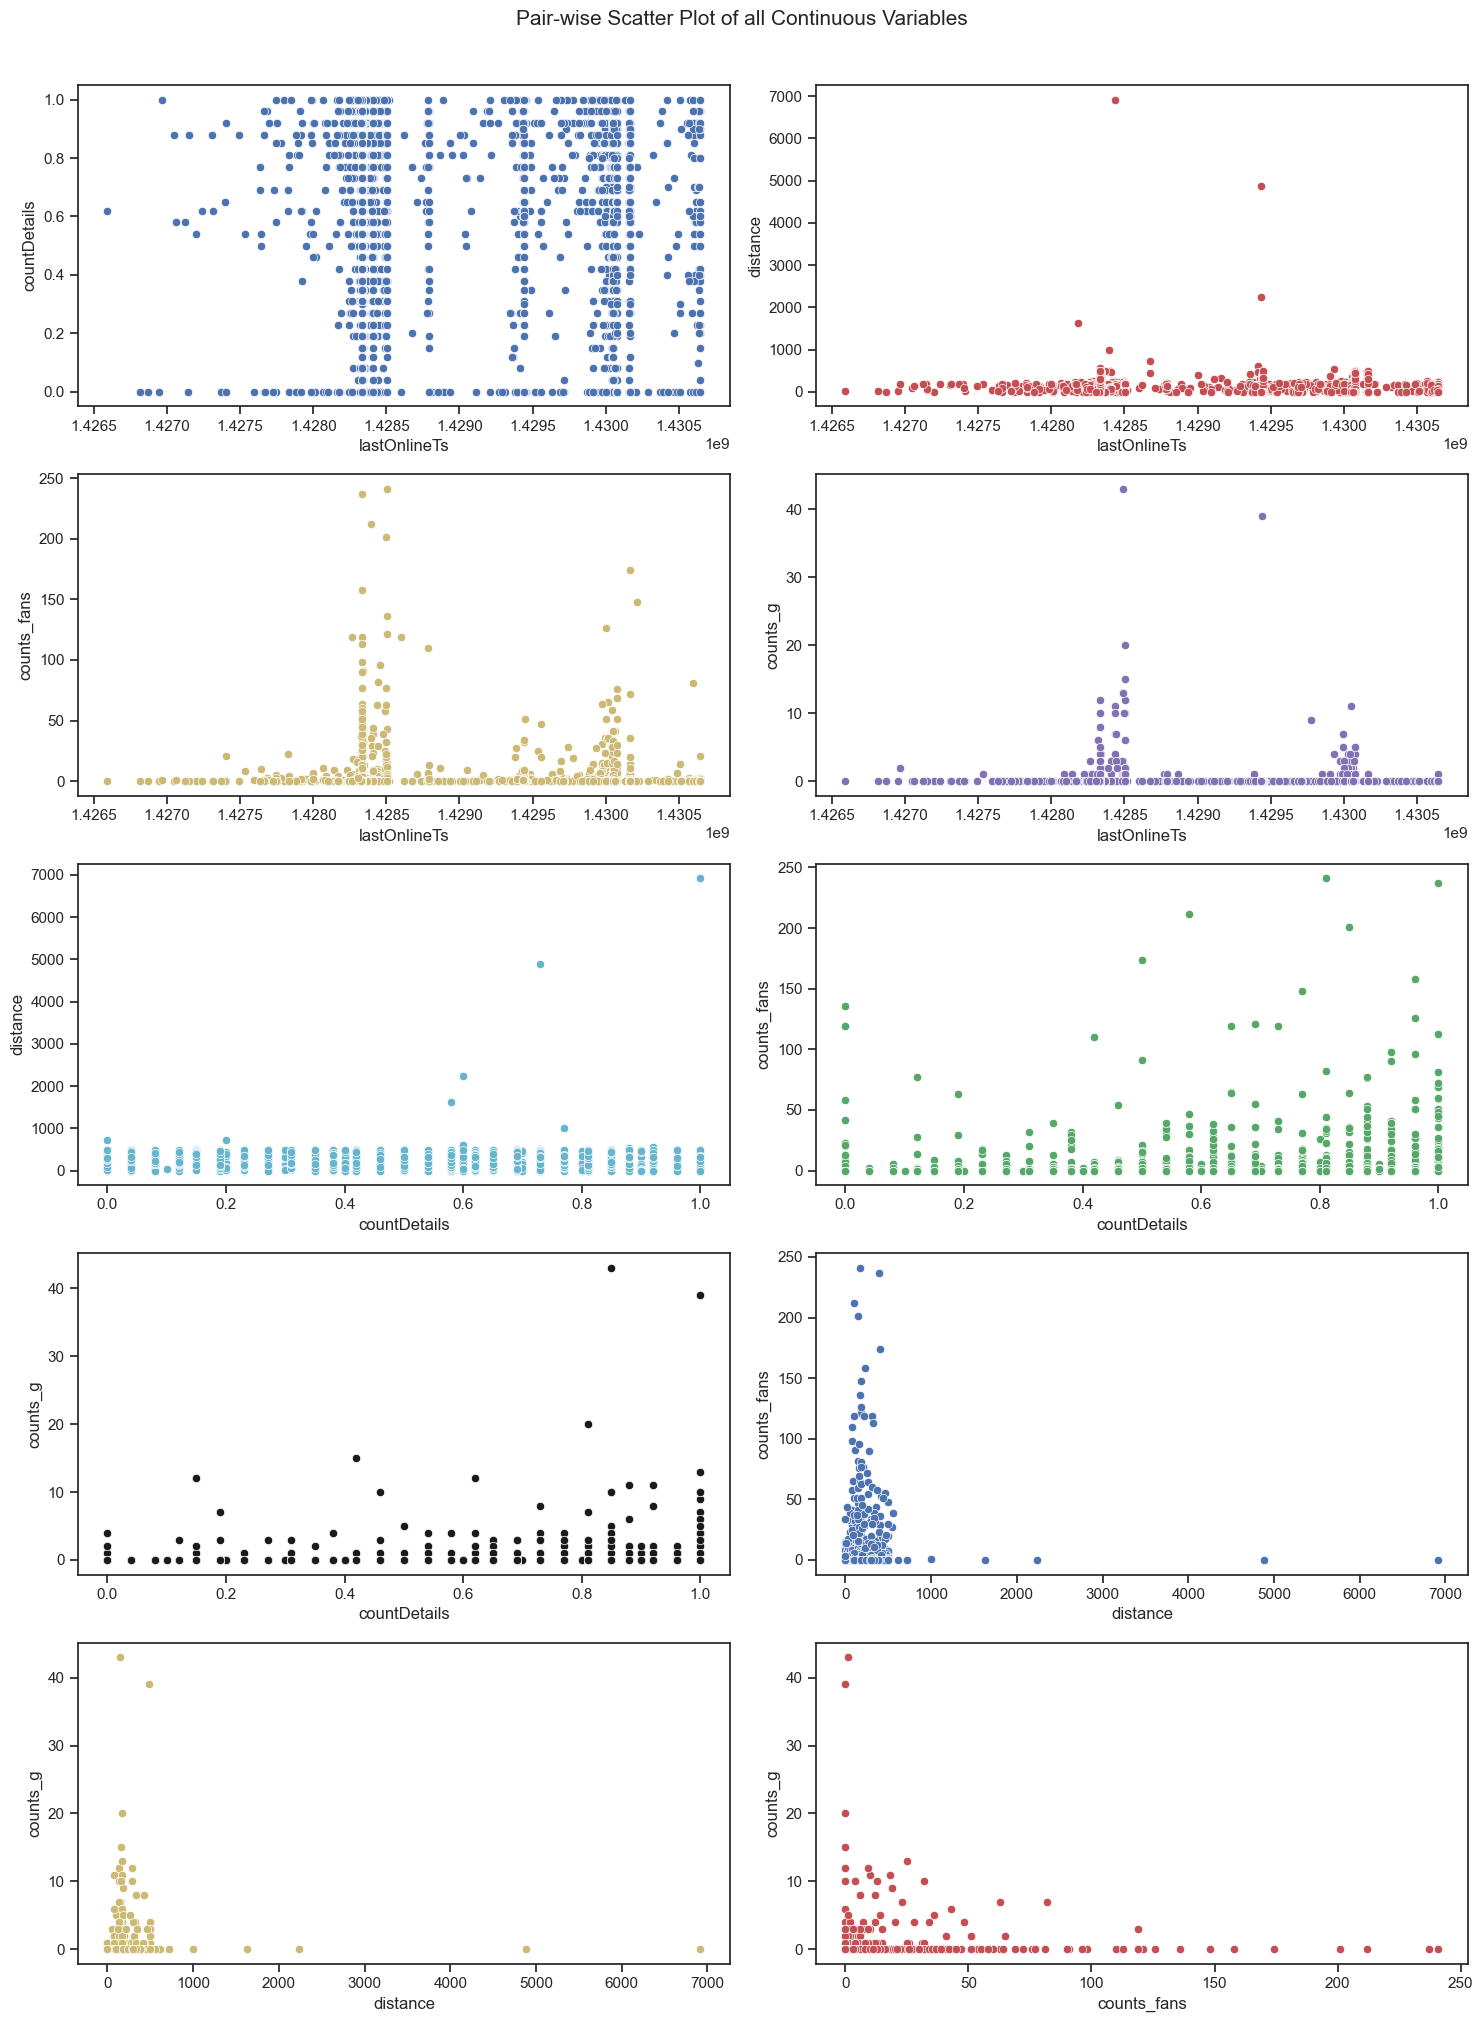

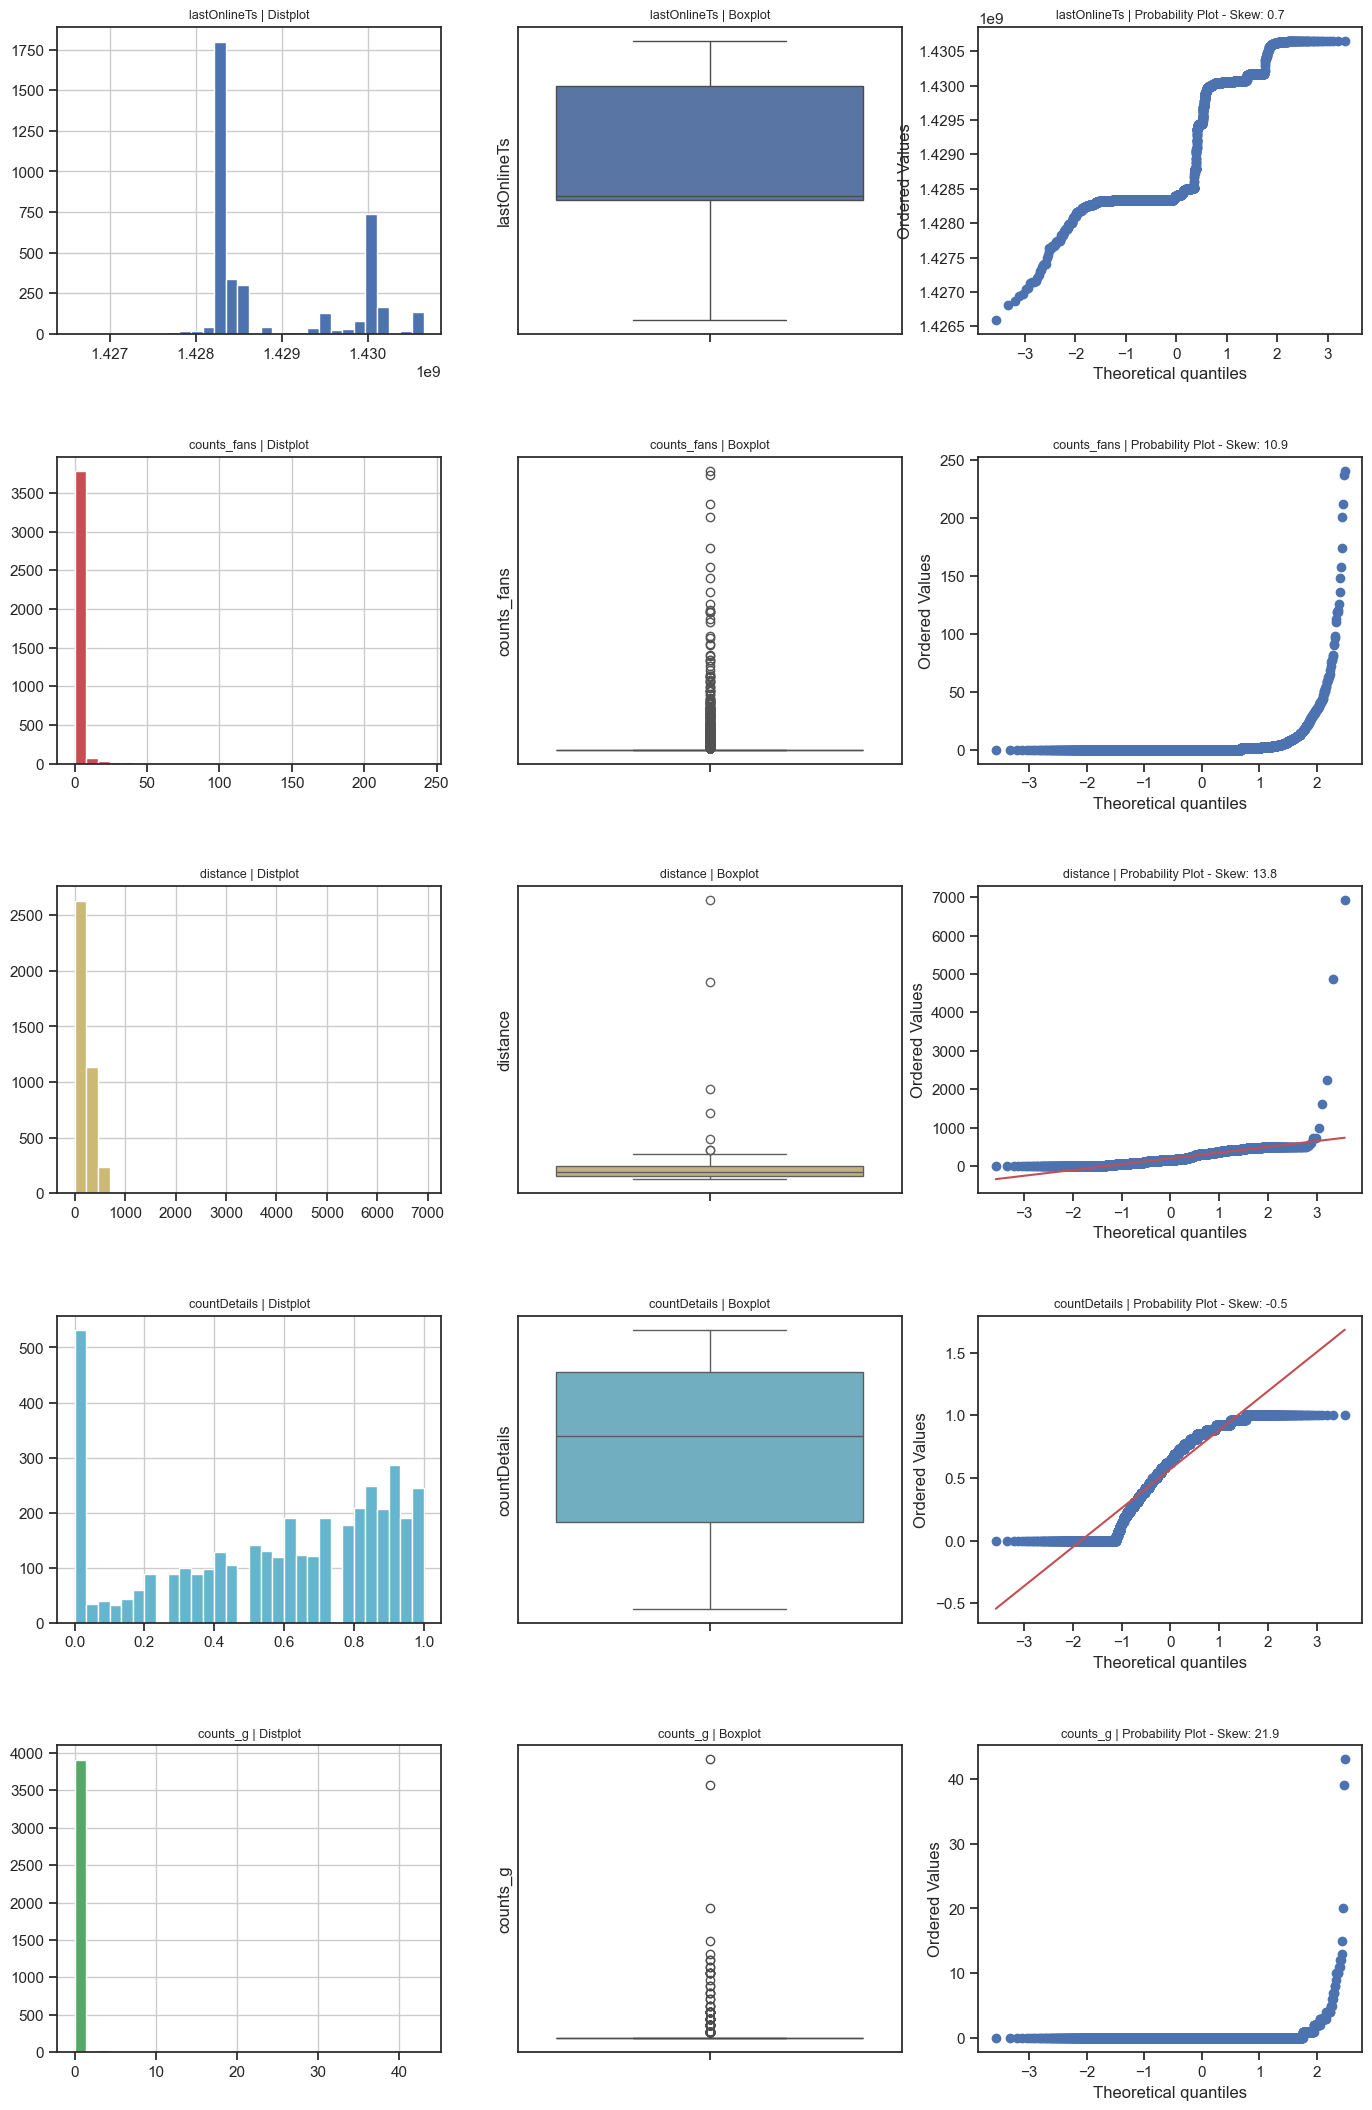

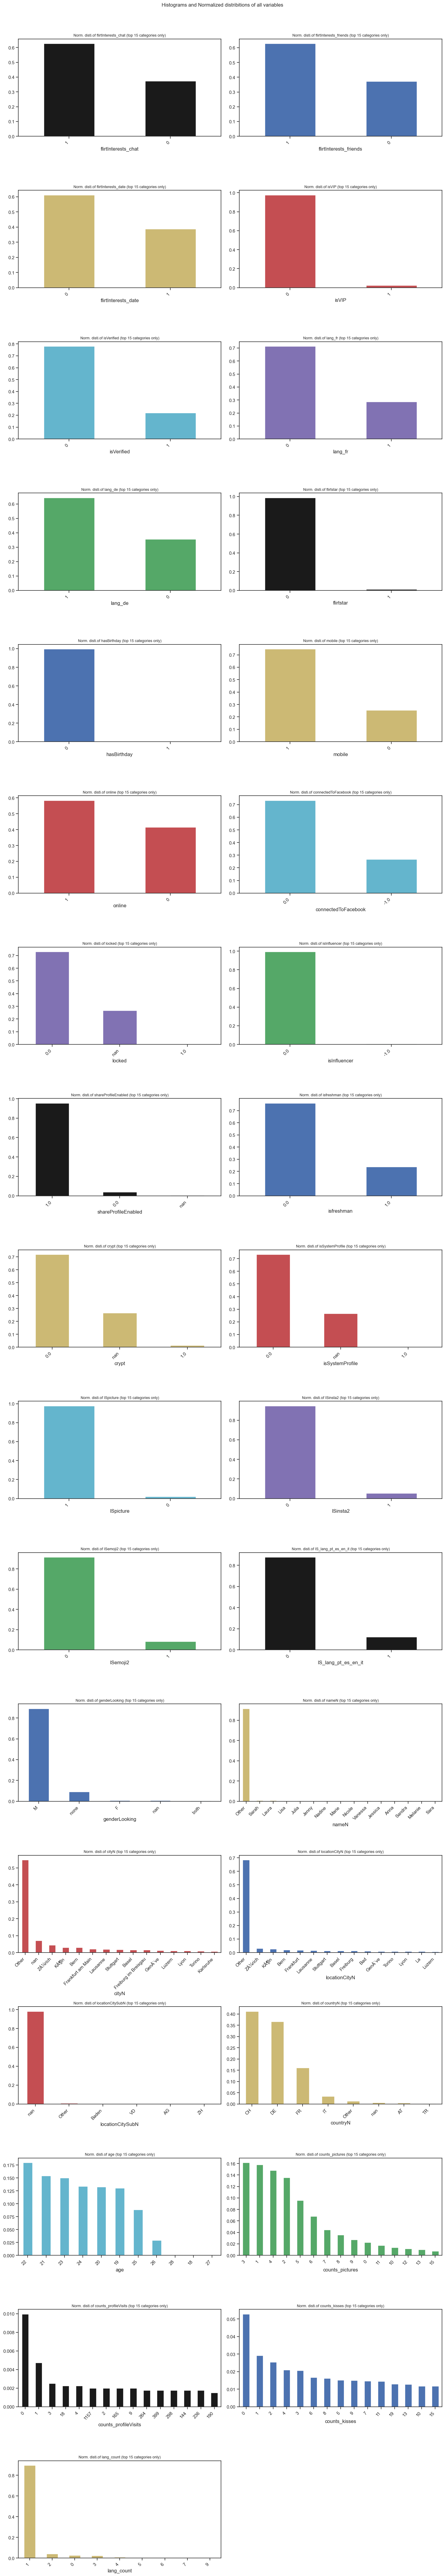

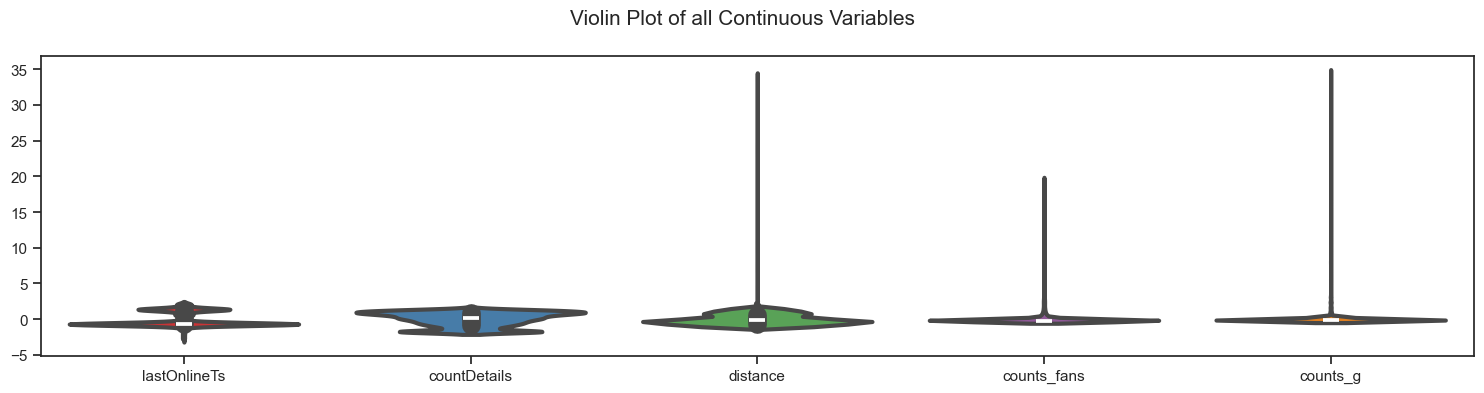

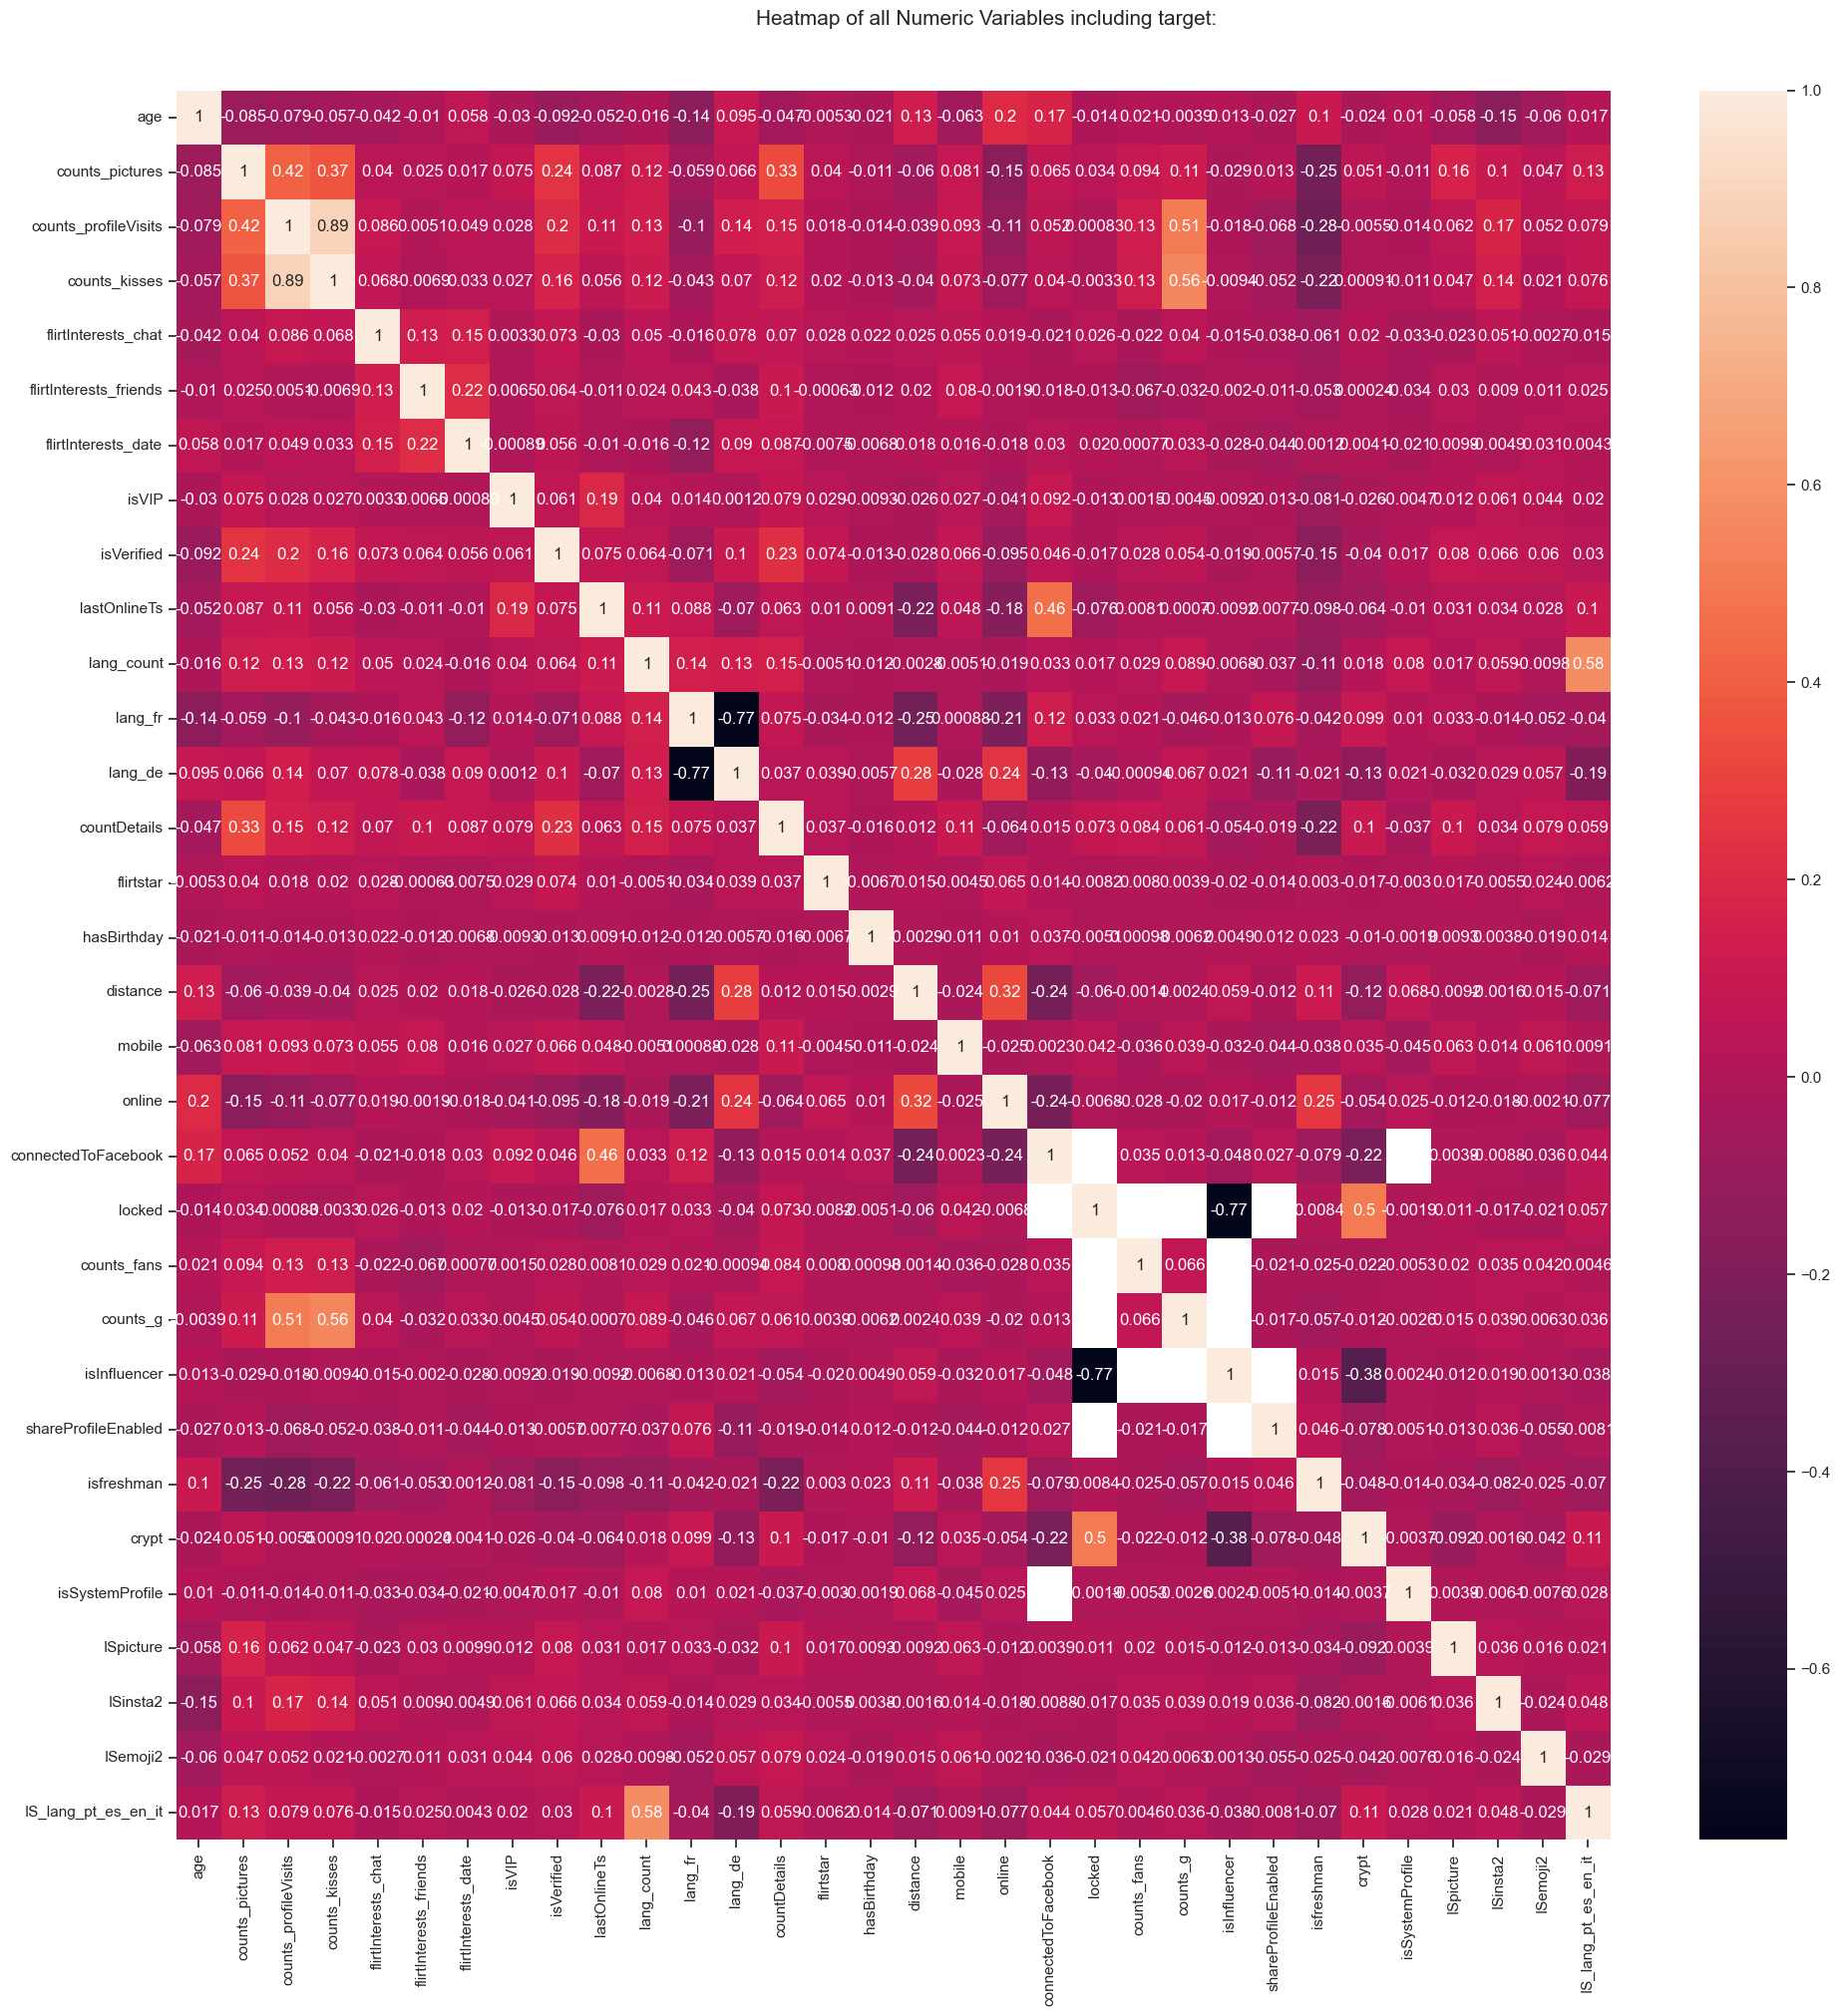

All Plots done
Time to run AutoViz = 25 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


age  \
userId                                                             
4e3842f79b70e7ea57000064                                     25    
4e3d34bf5d2bce7b160006a3                                     22    
4eef8b81ebf2c8f64000000c                                     20    
4ef9434cca61bece6a000002                                     24    
4f10cbc1883fa97a5f000015                                     24    
...                                                          ...   
55229e2fe66da132848b45a9                                     21    
55229eb5e56da11a2c8b45a6                                     24    
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyXiugVQ4sVCQ==  24    
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mbQ3s95pSAig==  21    
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==  20    

                                                             counts_pictures  \
userId                                                                         
4e3842f79b70e7ea57000064                                            4          
4e3d34bf5d2bce7b160006a3                                            5          
4eef8b81ebf2c8f64000000c                                            3          
4ef9434cca61bece6a000002                                           18          
4f10cbc1883fa97a5f000015                                           13          
...                                                                      ...   
55229e2fe66da132848b45a9                                            0          
55229eb5e56da11a2c8b45a6                                            0          
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyXiugVQ4sVCQ==         7          
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mbQ3s95pSAig==         5          
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==         8          

                                                             counts_profileVisits  \
userId                                                                              
4e3842f79b70e7ea57000064                                              8279          
4e3d34bf5d2bce7b160006a3                                               663          
4eef8b81ebf2c8f64000000c                                             22187          
4ef9434cca61bece6a000002                                              7339          
4f10cbc1883fa97a5f000015                                             18672          
...                                                                           ...   
55229e2fe66da132848b45a9                                                 0          
55229eb5e56da11a2c8b45a6                                                 0          
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyXiugVQ4sVCQ==           6049          
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mbQ3s95pSAig==            378          
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==           1014          

                                                             counts_kisses  \
userId                                                                       
4e3842f79b70e7ea57000064                                          239        
4e3d34bf5d2bce7b160006a3                                           13        
4eef8b81ebf2c8f64000000c                                         1015        
4ef9434cca61bece6a000002                                          180        
4f10cbc1883fa97a5f000015                                          492        
...                                                                    ...   
55229e2fe66da132848b45a9                                            0        
55229eb5e56da11a2c8b45a6                                            0        
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyXiugVQ4sVCQ==       507        
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mbQ3s95pSAig==        26        
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==        43        

              

In [32]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
#AV.AutoViz(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\flatfile.csv')
AV.AutoViz(df)
